# CS5920 Coursework: Assignment 2

<b>1) Load the scikit-learn version of the diabetes dataset and check the details in the description of the dataset</b>

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

<b>2) Split the dataset using my birthday as random_state.</b>

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'],random_state=2707)  
# split into train & test

<b>3-A) What is the training and test R^2 for the Lasso model using the default parameters? </b>

In [3]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print("Using default lasso.score function")
print("Training R^2 is ",lasso.score(X_train,y_train))
print("Test R^2 is ",lasso.score(X_test,y_test))

Using default lasso.score function
Training R^2 is  0.3752615130620861
Test R^2 is  0.3356480040657539


In [4]:
dict1 = dict(zip(diabetes.feature_names, lasso.coef_))
dict1

{'age': 0.0,
 'sex': 0.0,
 'bmi': 380.50656728833906,
 'bp': 0.0,
 's1': 0.0,
 's2': 0.0,
 's3': -0.0,
 's4': 0.0,
 's5': 330.51673469321287,
 's6': 0.0}

<b>3-B) How many features does this model use? What are the names of those features?</b>

There are 10 feature variables in this default model which have been normalized, but the model uses only 2 features with coefficient not equal to 0.<br/>
These are <b>bmi, s5</b>

<b>4. Load the original file diabetes.data from the web page</b>

In [5]:
import numpy as np
col = 10
Org_diabetes = np.genfromtxt("diabetes.data",delimiter="\t",usecols=np.arange(col))
OX = np.genfromtxt("diabetes.data",delimiter="\t",usecols=np.arange(col),skip_header=1)
oy = np.genfromtxt("diabetes.data",delimiter="\t",usecols = col, dtype=int,skip_header=1)

<b>5) Split the dataset into the training and test sets using my birthday as random_state.</b>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

OX_train, OX_test, oy_train, oy_test = train_test_split(OX,oy,random_state=2707) # split into train & test

original_lasso = Lasso().fit(OX_train,oy_train)
print("Training R^2 is ",original_lasso.score(OX_train,oy_train))
print("Test R^2 is ",original_lasso.score(OX_test,oy_test))

Training R^2 is  0.5291526231532143
Test R^2 is  0.45432152456259345


In [7]:
org_dict = dict(zip(diabetes.feature_names, original_lasso.coef_))
org_dict

{'age': -0.15803327770724016,
 'sex': -16.785570373553096,
 'bmi': 6.098970824496686,
 'bp': 0.8680829354809336,
 's1': -0.3011258686993192,
 's2': 0.08327290900076686,
 's3': -0.4528993629522233,
 's4': 3.884057425950532,
 's5': 47.38562125225051,
 's6': 0.5586273101120138}

<b>6) What is the training and test R^2 for the new dataset model & how many features are being used by this model? </b>

The new dataset model uses all the <b>10 features.</b>

Using this new dataset <br/>
<b>Training R^2</b> is  0.5291526231532143 <br/>
<b>Test R^2</b> is  0.45432152456259345

Compairing the result with the result in <b>item 3</b>, it can be seen that more features are being used by this new model so R^2 values are more than previous dataset. 

<b>7) Preprocessing the training and test sets using StandardScaler.</b>

In [8]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(OX_train)

OX_train_scaled = std_scaler.transform(OX_train)
OX_test_scaled = std_scaler.transform(OX_test)

In [9]:
lasso_8 = Lasso().fit(OX_train_scaled,oy_train)
print("Training R^2 is ",lasso_8.score(OX_train_scaled,oy_train))
print("Test R^2 is ",lasso_8.score(OX_test_scaled,oy_test))

Training R^2 is  0.5284043647664709
Test R^2 is  0.45560871727314545


In [10]:
org_dict = dict(zip(diabetes.feature_names, lasso_8.coef_))
org_dict

{'age': -0.5609166208692751,
 'sex': -9.027615222777609,
 'bmi': 26.301386889081655,
 'bp': 10.507957568211486,
 's1': -6.41571936831947,
 's2': -0.0,
 's3': -7.218633317064151,
 's4': 3.9303888139005165,
 's5': 25.450447350784163,
 's6': 4.918969148959157}

<b>8) Are your current results closer to those in item 3 or item 6?</b>


After using StandardScaler<br/>
<b>Training R^2</b> is  0.5284043647664709<br/>
<b>Test R^2</b> is  0.45560871727314545

The number of features now used by this models is 9, which are <b>'age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'</b>

<b>- Are your current results closer to those in item 3 or item 6?</b>

In this model the result is closer to the item 6 result which is opposite to our expectation because item 6 use StandardScaler to scale the original data, while in item 3, already normalized data is being used which gives wrong result.

<b>9) Varying the parameter α in the Lasso, plot the test R2 vs the number of features used</b>

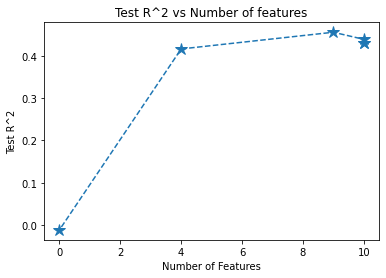

In [11]:
# Different alpha values
a = [0.001, 0.01, 0.1, 1, 10, 100]
RX = [] # list to save score
RY = [] # list to store coefficients

for i in range(len(a)): 
    lasso_compare = Lasso(alpha=a[i]).fit(OX_train_scaled,oy_train)
    RX.append(np.sum(lasso_compare.coef_!=0))
    RY.append(lasso_compare.score(OX_test_scaled,oy_test))
    
import matplotlib.pyplot as plt
plt.plot(RX, RY, linestyle='dashed', marker='*', markersize=12)
plt.xlabel("Number of Features")
plt.ylabel("Test R^2")
plt.title("Test R^2 vs Number of features")
plt.show()

From the graph above, <b>(9, 0.50)</b> looks the best point, at which <b>Alpha = 0.001</b><br/>

<b>10) Choose the regularization parameter for the Lasso using cross-validation on the training set.</b>

In [12]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), {'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}, cv=5)
grid_search.fit(OX_train_scaled, oy_train)
grid_search.score(OX_test_scaled, oy_test)

0.42917585833024785

In [13]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.001}
0.5023517044585724


<b>Here alpha is 0.001, which verifies the alpha value getting in item 9</b>

In [14]:
lasso_10 = Lasso(alpha=0.001).fit(OX_train_scaled, oy_train)
print("Training R^2 is", lasso_10.score(OX_train_scaled, oy_train))
print("Test R^2 is", lasso_10.score(OX_test_scaled, oy_test))
print("Number of features used are", np.sum(lasso_10.coef_!=0))

Training R^2 is 0.538279760152443
Test R^2 is 0.42917585833024785
Number of features used are 10


Using <b>5 fold cross validation, 0.001 is the best alpha</b><br/>
Using <b>alpha = 0.001</b>, we get following values:<br/>
<b>Training R^2</b> :  0.538279760152443<br/>
<b>Test R^2</b> :  0.42917585833024785<br/>
Number of features used : 10

In [15]:
m = 99
X_train_proper, X_calibration, y_train_proper, y_calibration = train_test_split(OX_train, oy_train, 
                                                                                random_state=2707, test_size=m)
scaler = StandardScaler()
scaler.fit(X_train_proper)
X_train_proper_scaled = scaler.transform(X_train_proper)
X_calibration_scaled = scaler.transform(X_calibration)
X_test_scaled = scaler.transform(OX_test)

lasso_11 = Lasso().fit(X_train_proper_scaled, y_train_proper)
y_label_predict = lasso_11.predict(X_test_scaled)
y_hat_predict = lasso_11.predict(X_calibration_scaled)

# nonconformity scores
alpha = np.subtract(y_calibration ,y_hat_predict)

#sort the nonconformity scores
alpha = sorted(alpha)

# k = [(1-e)(m+1)]
k_05  = (1 - 0.05) *(m + 1)
k_20  = (1 - 0.20) *(m + 1)

# c = α(k)
c_05 = alpha[int(k_05) - 1]
c_20 = alpha[int(k_20) - 1]


print("k for 5%:", k_05)
print("k for 20%:", k_20)

print("c for 5%:", c_05)
print("c for 20%:", c_20)

print("Length for 5%:", c_05*2)
print("Length for 20%:", c_20*2)

k for 5%: 95.0
k for 20%: 80.0
c for 5%: 87.97487556656074
c for 20%: 46.92113193926667
Length for 5%: 175.94975113312148
Length for 20%: 93.84226387853334


In [16]:
# prediction set for any predicted sample is [yˆ − c , yˆ + c ]
y_pos_05 = y_label_predict + c_05
y_neg_05 = y_label_predict - c_05

y_pos_20 = y_label_predict + c_20
y_neg_20 = y_label_predict - c_20

# Check if prediction set exist in test sample
err_05 = []
for i in range(1, len(oy_test)):
    err_05.append(1 if  y_neg_05[i] <= oy_test[i] <= y_pos_05[i] else 0)

print(1- np.mean(err_05))

err_20 = []
for i in range(1, len(oy_test)):
    err_20.append(1 if  y_neg_20[i] <= oy_test[i] <= y_pos_20[i] else 0)

print(1- np.mean(err_20))

0.13636363636363635
0.3909090909090909


Error rates at significance level for 5% = 0.13636363636363635 <br/>
Error rates at significance level for 20% = 0.3909090909090909